## Studying sample 17NR2154

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from matplotlib.ticker import ScalarFormatter
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [2]:
# Read coverage per base file and add column names to the file
header = ["chr", "start", "end", "feature", "base", "17NR2122", "17NR2123", 
          "17NR2124", "17NR2125", "17NR2126", "17NR2127", "17NR2128", "17NR2129", 
          "17NR2130", "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
          "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", "17NR2141", 
          "17NR2142", "17NR2143", "17NR2144", "17NR2145", "17NR2146", "17NR2147", 
          "17NR2148", "17NR2149", "17NR2150", "17NR2151", "17NR2152", "17NR2153", 
          "17NR2154"]
df = pd.read_csv("./pasted_coverages-chr11.tsv", sep="\t", names=header, index_col=False)
df.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2145,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154
0,11,2011230,2921230,SRS,1,42,19,78,62,34,...,46,59,41,44,44,40,54,42,53,44
1,11,2011230,2921230,SRS,2,46,19,78,64,34,...,46,60,41,44,46,40,54,42,54,46
2,11,2011230,2921230,SRS,3,46,19,79,65,34,...,47,61,42,45,47,42,54,42,56,47
3,11,2011230,2921230,SRS,4,47,19,81,67,34,...,48,61,44,47,48,46,55,43,57,49
4,11,2011230,2921230,SRS,5,49,20,85,69,34,...,48,62,46,48,48,46,59,44,60,49


In [3]:
dic_total_reads = {"17NR2122":6794137, "17NR2123":3870331, "17NR2124":8761807, "17NR2125":7956425, 
                "17NR2126":4976172, "17NR2127":2399678, "17NR2128":5845975, "17NR2129":7520553, "17NR2130":7544035, 
                "17NR2131":8224731, "17NR2132":6843457, "17NR2133":6604556, "17NR2134":7510350, "17NR2135":7016579, 
                "17NR2136":8359478, "17NR2137":7663546, "17NR2138":9244365, "17NR2139":7487638, "17NR2140":8640616, 
                "17NR2141":7406296, "17NR2142":5602032, "17NR2143":7164379, "17NR2144":7068970, "17NR2145":9307389,
                "17NR2146":7300131, "17NR2147":7013634, "17NR2148":7278219, 
                   "17NR2149":6378808, "17NR2150":8210828, "17NR2151":8707031, 
                   "17NR2152":7102156, "17NR2153":8520552, "17NR2154":7290042}

list_samples = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", 
                "17NR2126", "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153", "17NR2154"]
dff = df.copy()

In [4]:
# Normalize using total number of reads for each sample
for elem in list_samples:
    dff[elem] = (dff[elem]/dic_total_reads[elem])*10**5

# Calculate mean coverage 
dff["mean"] = dff.loc[:, list_samples].mean(axis=1)
list_samples = list_samples + ["mean"]

dff.shape

(910000, 39)

In [58]:
# Do not take into account positions with coverage = 0, they correspond to repetitive sequences
da = dff.loc[dff['base'] < 108479 ][dff["mean"] != 0.0].reset_index(drop=True)
da.shape

/home/ugdg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(72542, 39)

In [59]:
# Create column with the ratio between the sample and mean of samples
da["division"] = da["17NR2154"]/da["mean"]

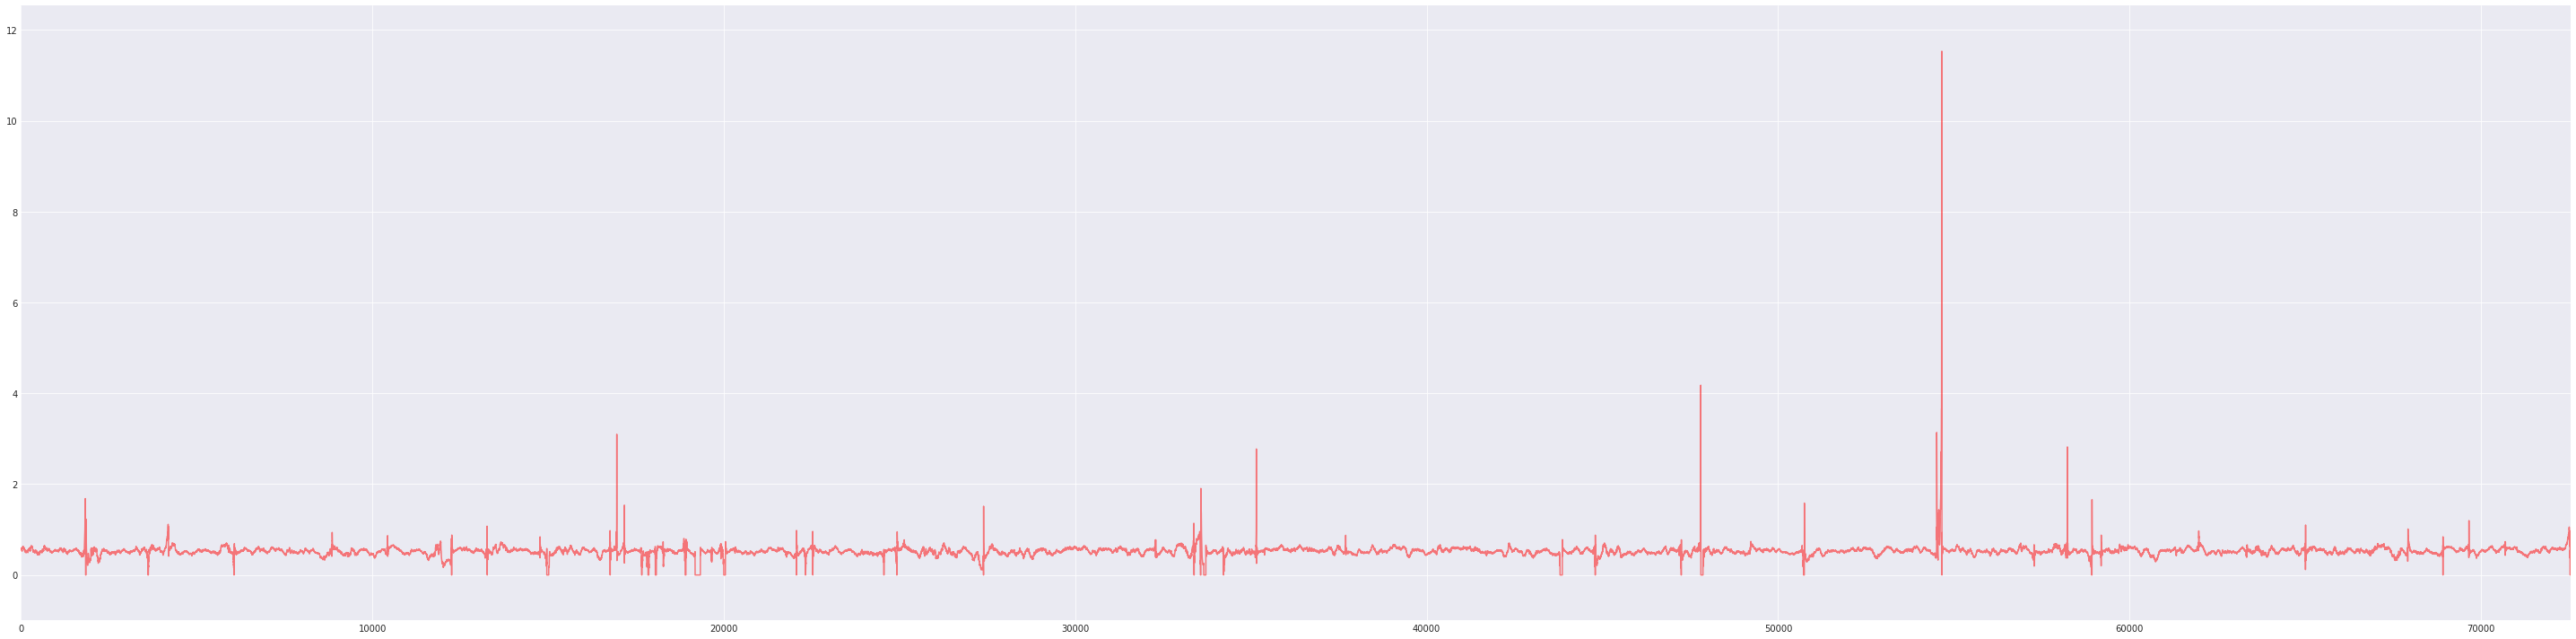

In [60]:
# Plot the ratio, it is mostly 0.5, this means it is a 1x deletion
da["index"] = da.index

fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

ax1.set_ylim(-1, da["division"].max() + 1)
ax1.set_xlim(da["index"].min(), da["index"].max())

ax1.plot(da["index"], da["division"], alpha = 0.5, color = "red")

fig.tight_layout()
plt.show()
plt.close(fig)

In [61]:
# Check mean of change ratio between normal samples and the sample of interest
da["division"].mean()

0.5230275395106226

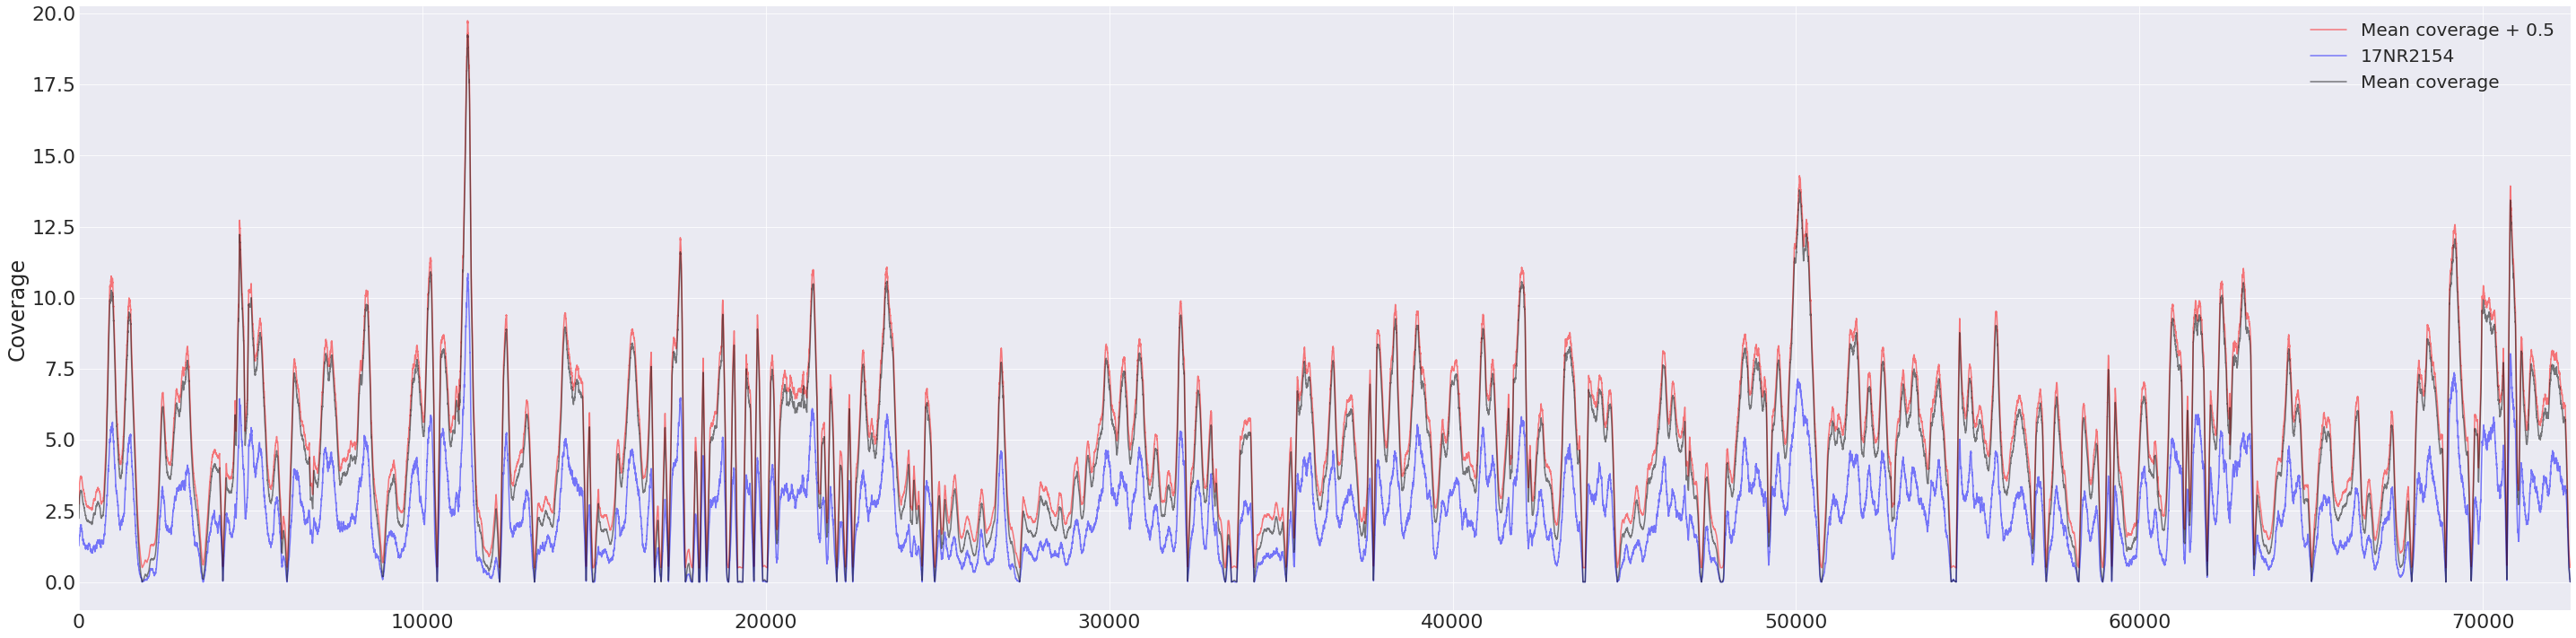

In [62]:
# Plot mean coverage, our sample of interest and the expected ratio of 0.5 for deletions of 1x
da["index"] = da.index

fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

ax1.set_ylim(-1, da["mean"].max() + 1)
ax1.set_xlim(da["index"].min(), da["index"].max())

ax1.plot(da["index"], 0.5 + da["mean"], alpha = 0.5, color = "red")
ax1.plot(da["index"], da["17NR2154"], alpha = 0.5, color = "blue")
ax1.plot(da["index"], da["mean"], alpha = 0.5, color = 'black')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax1.set_ylabel('Coverage', fontsize=24)

ax1.legend(fontsize = 20, labels=["Mean coverage + 0.5", "17NR2154", "Mean coverage"])

fig.tight_layout()
plt.show()
plt.close(fig)